## Tutorial: Modeling Faces using PCA 

### In this tutorial, and associated homework, we will model faces using PCA, and learn how to detect a smile.  


In [1]:
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA 

#### In the attached file, I have 72 faces, each one 50 pixels x 50 pixels.
#### 36 faces are labeled "neutral" while 36 faces are labeled "smiling"  

In [2]:
f = loadmat('data/faces.mat')
faces = f['faces'] #This are the faces.  There are 72 faces closely cropped to the boundary of the face.
smiling = f['smiling'][0] #Flag to indicate if the face was a smile. 0 means neutral expression and 1 means smiling.

#### Visualize some of the faces

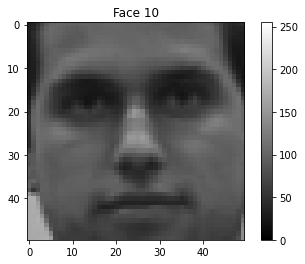

In [3]:
sample = 10
plt.figure()
plt.imshow(faces[10,:,:],cmap='gray',vmin = 0,vmax = 255) #why did i choose 0,255 (hint: 8 bit images)
plt.title('Face ' + str(sample))
#plt.axis('off')
plt.colorbar()

#### Here's a little code box I used to get some empirical information on the the faces 

In [4]:
np.max(faces)

222.22671761601015

#### Lets get the mean face 

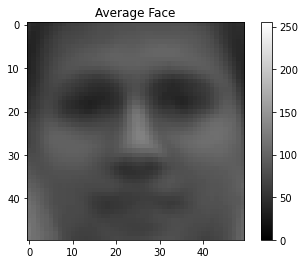

In [5]:
meanface = np.mean(faces,axis = 0)
plt.figure()
plt.imshow(meanface,cmap='gray',vmin = 0,vmax = 255) #why did i choose 0,255 (hint: 8 bit images)
plt.title('Average Face')
#plt.axis('off')
plt.colorbar()

#### Problem #1 Visualize the mean face for smiling and neutral faces.  
####            Also make an image of the difference between the two mean faces. 

#### If we were to do a statistical test of the difference between smiling and neutral faces, the simplest thing to do is to use an independent samples **t-test**
#### The first 36 images are neutral and the next 36 images are smiling faces.  
#### What we will do is at each image pixel we will do a t-test comparing the 36 values for a neutral face to the 36 values for smiling face 


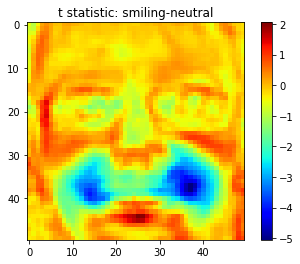

In [6]:
from scipy.stats import ttest_ind
#
t,p = ttest_ind(faces[smiling == 1,:,:],faces[smiling == 0,:,:],axis = 0)
plt.figure()
plt.imshow(t,cmap='jet')
plt.title('t statistic: smiling-neutral')
#plt.axis('off')
plt.colorbar()

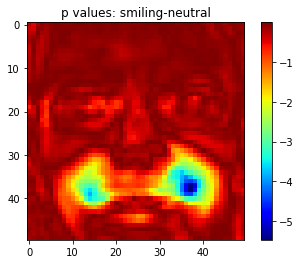

In [7]:
plt.figure()
plt.imshow(np.log10(p),cmap='jet')
plt.title('p values: smiling-neutral')
#plt.axis('off')
plt.colorbar()
plt.show()

#### Lets examine what this means.  

#### I want to remind you of what **Significance** means in a statistical test. 

In [8]:
alpha = 0.05 #significance level 
nsig = len(p  < alpha)
print('nigs: ', nsig)
ntests = 50*50
print('ntests :', ntests)
false_rate = ntests*alpha 
print('false_rate:', false_rate)

nigs:  50
ntests : 2500
false_rate: 125.0


#### PCA analysis of faces 

In [9]:
faces2 = faces.reshape(72,50*50) # the data matrix is 72 by 2500 and there are 2500 variables and 72 observations.  
meanfaces2 = meanface.reshape(50*50)
ncomp = 72  # I am going to choose to look at 72 components. 
pca = PCA(n_components = ncomp) #decide of number of components. ALWAYS less than or equal to smaller dimension of data matrix
pca.fit(faces2) #fit the model
face_loading = pca.components_ #get the eigenvectors
face_latent = pca.explained_variance_ #get the explained variance
face_percentage_explained  = face_latent/sum(face_latent)
face_components = pca.transform(faces2)

#### Examine the explained variance. 

Text(0, 0.5, 'Percentage Variance')

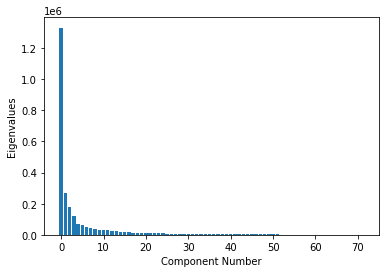

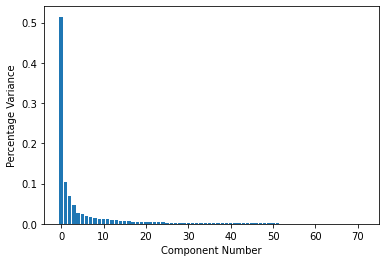

In [10]:
plt.figure()
plt.bar(np.arange(0,ncomp,1),face_latent)
plt.xlabel('Component Number')
plt.ylabel('Eigenvalues')
plt.figure()
plt.bar(np.arange(0,ncomp,1),face_percentage_explained)
plt.xlabel('Component Number')
plt.ylabel('Percentage Variance')



#### Im going to use reshape to reshape the loading vectors into images

### Problem #2  Visualize using imshow the first 5 loading vectors.  

#### To help you do this problem, I am going to reshape the loading vector back into the shape of the original image

In [11]:
face_loading_image = face_loading.reshape(ncomp,50,50)
### write your code here to look at the first 5 loading vectors as images 

#### What do the components look like?

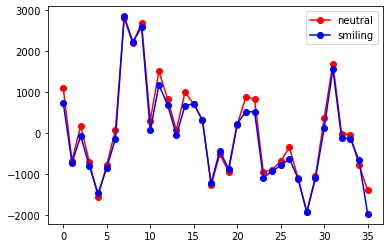

In [12]:
c = 0
plt.plot(face_components[smiling == 0,c],'ro-')
plt.plot(face_components[smiling == 1,c],'bo-')
plt.legend(('neutral','smiling'))
plt.show()


Problem #3 Use the independent samples t test on the face_components variables
Find which components capture the difference between neutral and smiling and visualize them

#### Finally, out of completeness, I demonstrate that I can reconstruct the images from the eigenfaces 

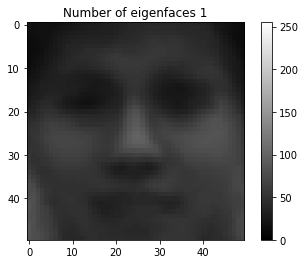

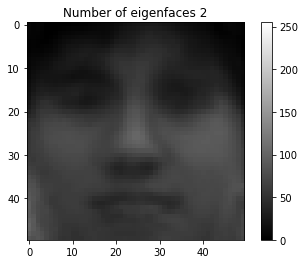

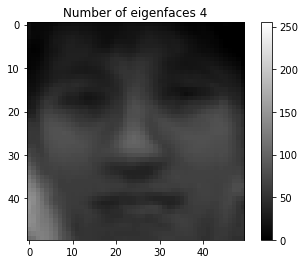

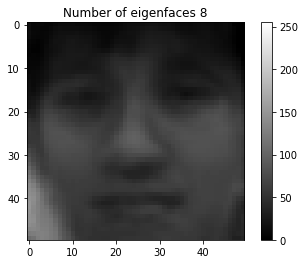

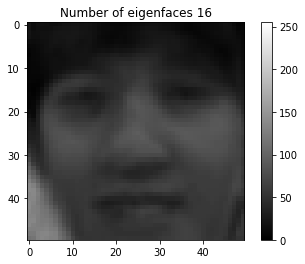

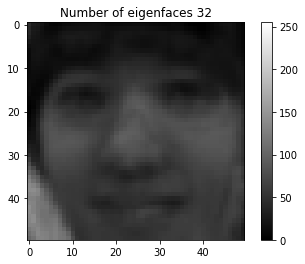

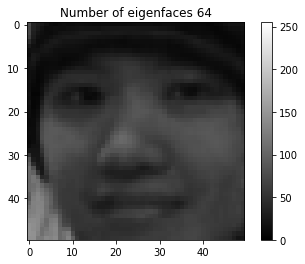

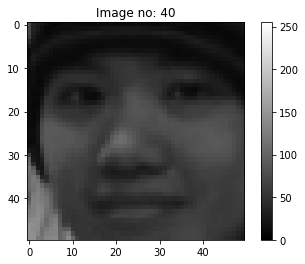

In [13]:
imageno = 40
ncomp = [1,2,4,8,16,32,64]
for j in range(len(ncomp)):
    compface = face_components[imageno,np.arange(ncomp[j])]@face_loading[np.arange(ncomp[j]),:]
    makeface = compface.reshape(50,50) +meanface
    plt.figure()
    plt.imshow(makeface,cmap='gray',vmin = 0,vmax = 255)
    plt.title('Number of eigenfaces ' + str(ncomp[j]))
    plt.colorbar()

f1 = faces[imageno,:,:]
plt.figure()
plt.imshow(f1,cmap='gray',vmin = 0,vmax = 255)
plt.title('Image no: ' + str(imageno))
plt.colorbar() 